In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [ ]:
df = pd.read_csv('/content/data1.csv')

In [ ]:
df.shape

(500, 4)

In [ ]:
example = df['Reviews'][15]
print(example)

The match making in clan league war is so unfair!!!! Im th9 and my opponent is th11. lolz. Crazy matchmaking


In [ ]:
df.head()

,Id,UserName,Ratings,Reviews
0,1,Md Israfil,5,Nice gem
1,2,Mithu Das,5,Good game for mind
2,3,Ruben Micheel,1,dosnt open
3,4,Gina Marcelino,1,get started
4,5,sumit singh,5,Best game


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
print(example)

The match making in clan league war is so unfair!!!! Im th9 and my opponent is th11. lolz. Crazy matchmaking


In [ ]:
encoded_text = tokenizer(example,return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
    
}
print(scores_dict)

{'roberta_neg': 0.9431928, 'roberta_neu': 0.04962384, 'roberta_pos': 0.0071833916}


In [ ]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example,return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
    
  }
  return scores_dict

In [12]:
res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
    text = row['Reviews']
    myid = row['Id']
    #vader_result = sia.polarity_scores(text)
    res[myid] = polarity_scores_roberta(text)
    #roberta_result = polarity_scores_roberta(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [13]:
res

{1: {'roberta_neg': 0.0045275497,
  'roberta_neu': 0.08527406,
  'roberta_pos': 0.91019845},
 2: {'roberta_neg': 0.0066049327,
  'roberta_neu': 0.077112995,
  'roberta_pos': 0.9162822},
 3: {'roberta_neg': 0.43457738,
  'roberta_neu': 0.48170212,
  'roberta_pos': 0.083720565},
 4: {'roberta_neg': 0.13581897,
  'roberta_neu': 0.59156036,
  'roberta_pos': 0.27262062},
 5: {'roberta_neg': 0.0067048394,
  'roberta_neu': 0.067396775,
  'roberta_pos': 0.9258984},
 6: {'roberta_neg': 0.0036624046,
  'roberta_neu': 0.050529037,
  'roberta_pos': 0.9458086},
 7: {'roberta_neg': 0.0015842711,
  'roberta_neu': 0.016788224,
  'roberta_pos': 0.98162764},
 8: {'roberta_neg': 0.2522999,
  'roberta_neu': 0.618216,
  'roberta_pos': 0.12948406},
 9: {'roberta_neg': 0.0064309333,
  'roberta_neu': 0.060108036,
  'roberta_pos': 0.93346107},
 10: {'roberta_neg': 0.03027388,
  'roberta_neu': 0.5181074,
  'roberta_pos': 0.4516188},
 11: {'roberta_neg': 0.18799807,
  'roberta_neu': 0.5990896,
  'roberta_pos': 0

In [14]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')

In [15]:
results_df.head(25)

,Id,roberta_neg,roberta_neu,roberta_pos,UserName,Ratings,Reviews
0,1,0.004528,0.085274,0.910198,Md Israfil,5,Nice gem
1,2,0.006605,0.077113,0.916282,Mithu Das,5,Good game for mind
2,3,0.434577,0.481702,0.083721,Ruben Micheel,1,dosnt open
3,4,0.135819,0.591560,0.272621,Gina Marcelino,1,get started
4,5,0.006705,0.067397,0.925898,sumit singh,5,Best game
5,6,0.003662,0.050529,0.945809,Josh Mcdonagh,5,Clash of clans is a game if you put time and e...
6,7,0.001584,0.016788,0.981628,Busra Moni,4,Time pass game 🎮 Nice game 🥰
7,8,0.252300,0.618216,0.129484,Matthew Kerr,5,More than a game.
8,9,0.006431,0.060108,0.933461,LATHA RAMESH,5,Super game
9,10,0.030274,0.518107,0.451619,omarshosho Rami,5,9.5/10


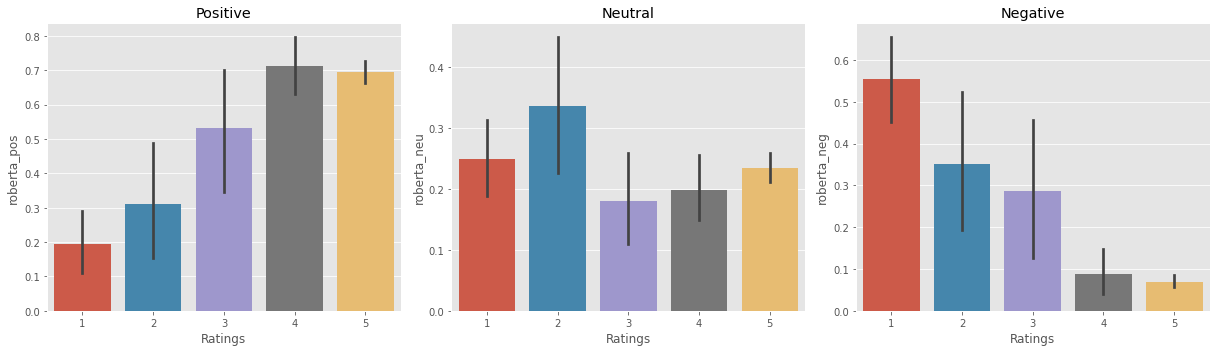

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(17,5))
sns.barplot(data=results_df,x = 'Ratings',y= 'roberta_pos', ax=axs[0])
sns.barplot(data=results_df,x = 'Ratings',y= 'roberta_neu', ax=axs[1])
sns.barplot(data=results_df,x = 'Ratings',y= 'roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()